In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Loading the dataset


In [ ]:
car_dataset=pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv')

Loading the first five rows using head function

In [ ]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


Using shape function to know number of rows and columns

In [ ]:
car_dataset.shape

(4340, 8)

info() function Gives information about dataset

In [ ]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


This provides number of null values

In [ ]:
car_dataset.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [ ]:
#checking distribution of categorical data
print(car_dataset.fuel.value_counts())
print(car_dataset.seller_type.value_counts())
print(car_dataset.transmission.value_counts())
print(car_dataset.owner.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64
owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


In [ ]:
#ENcoding categorical data
car_dataset.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)
car_dataset.replace({'seller_type':{'Dealer':0,'Individual':1,'Dealer':2,'Trustmark Dealer':3}},inplace=True)
car_dataset.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)
car_dataset.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)

<ipython-input-36-d7edca584462>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)
<ipython-input-36-d7edca584462>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'seller_type':{'Dealer':0,'Individual':1,'Dealer':2,'Trustmark Dealer':3}},inplace=True)


Loading first five rows after Label encoding

In [ ]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,1,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,1,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,1,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,0,1


Seperating Data and Labels

In [ ]:
x=car_dataset.drop(['name','selling_price'],axis=1)
y=car_dataset['selling_price']

In [ ]:
print(x)
print(y)

      year  km_driven fuel seller_type  transmission  owner
0     2007      70000    0           1             0      0
1     2007      50000    0           1             0      0
2     2012     100000    1           1             0      0
3     2017      46000    0           1             0      0
4     2014     141000    1           1             0      1
...    ...        ...  ...         ...           ...    ...
4335  2014      80000    1           1             0      1
4336  2014      80000    1           1             0      1
4337  2009      83000    0           1             0      1
4338  2016      90000    1           1             0      0
4339  2016      40000    0           1             0      0

[4340 rows x 6 columns]
0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


Splitting the data into train data & split data

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)
print(x.shape,x_train.shape,x_test.shape)

(4340, 6) (3906, 6) (434, 6)


Model training

In [ ]:
#loading linear_Regression model
lin_reg_model=LinearRegression()

In [ ]:
lin_reg_model.fit(x_train,y_train)

LinearRegression()

Model evaluation

In [ ]:
training_data_prediction=lin_reg_model.predict(x_train)

In [ ]:
error_score=metrics.r2_score(y_train,training_data_prediction)
print("R squared error:",error_score)

R squared error: 0.4269538990759001


Visualize actual price and predicted price

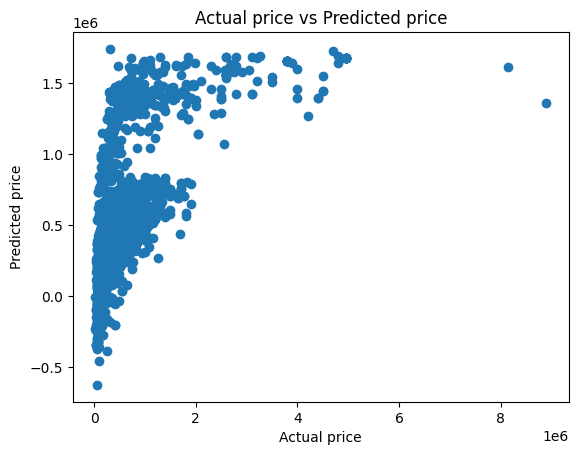

In [ ]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual price vs Predicted price")
plt.show()

In [ ]:
test_data_prediction=lin_reg_model.predict(x_test)

In [ ]:
error_score=metrics.r2_score(y_test,test_data_prediction)
print("R squared error:",error_score)

R squared error: 0.5032281025988081


Lasso regression

In [ ]:
lass_reg_model=Lasso()


In [ ]:
lass_reg_model.fit(x_train,y_train)

Lasso()

Model evaluation

In [ ]:
training_data_prediction=lass_reg_model.predict(x_train)

In [ ]:
error_score=metrics.r2_score(y_train,training_data_prediction)
print("R squared error:",error_score)

R squared error: 0.4269538990224745


Visualize actual price and predicted price

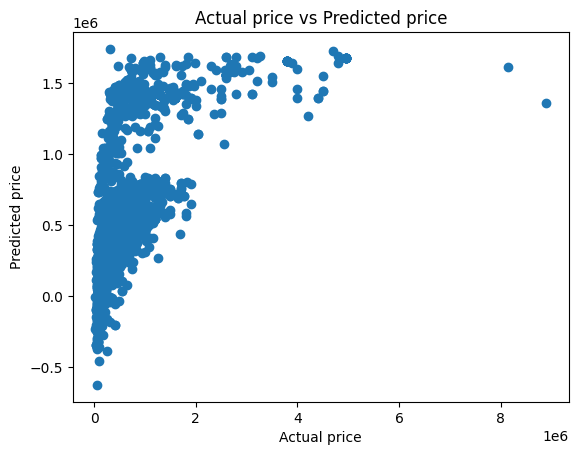

In [ ]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual price vs Predicted price")
plt.show()

In [ ]:
test_data_prediction=lass_reg_model.predict(x_test)

In [ ]:
error_score=metrics.r2_score(y_test,test_data_prediction)
print("R squared error:",error_score)

R squared error: 0.5032276607773478
